In [ ]:
#bibliotecas e módulos padrão para basicamente tudo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
#bibliotecas para codificação, sampling, e automação
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#bibliotecas para clusterização
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
base = pd.read_csv('vger.csv')

In [ ]:
base = base.drop(columns=['title', 'no_descriptors', 'mild_fantasy_violence', 'mild_cartoon_violence', 'alcohol_reference', 'console', 'mild_language'], axis = 1)

In [ ]:
label = preprocessing.LabelEncoder() 
base['esrb_rating']= label.fit_transform(base['esrb_rating']) 

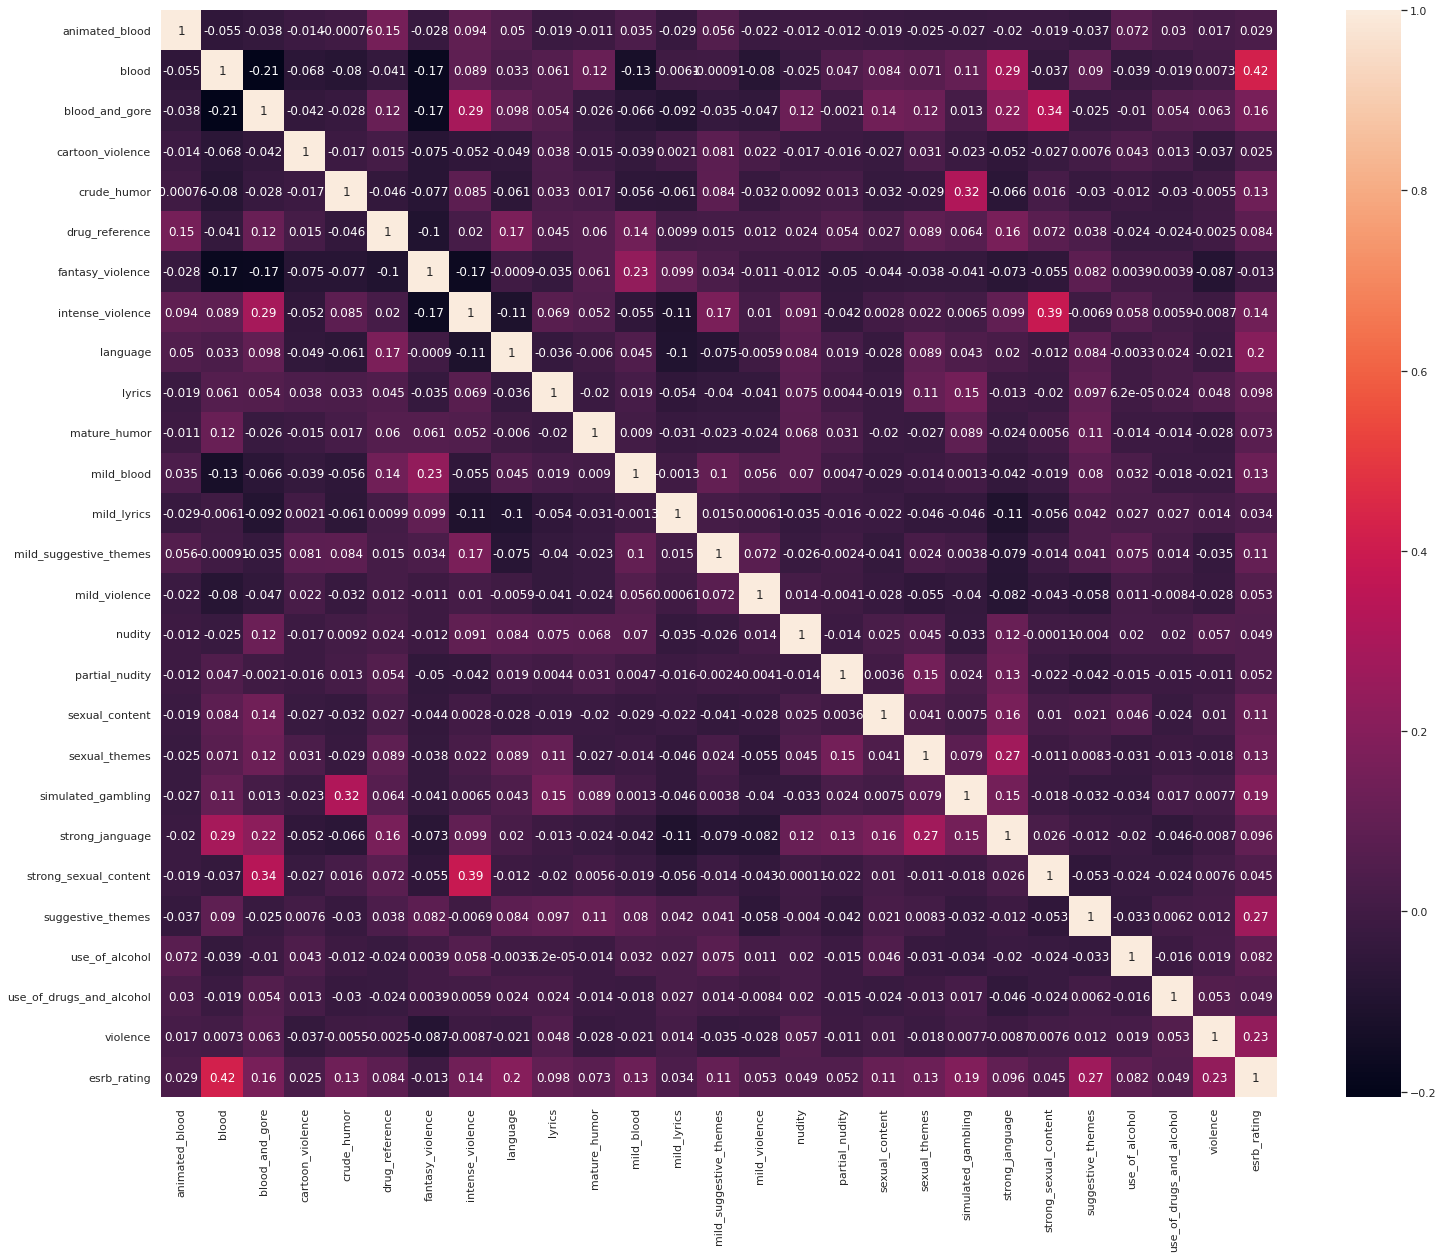

In [ ]:
corr = base.corr()
sns.set(rc={"figure.figsize":(25, 20)})
sns.heatmap(corr, annot=True)

In [ ]:
X = base.drop('esrb_rating', axis = 1)
y = base['esrb_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
knn5 = KNeighborsClassifier(p=2, n_neighbors=5, weights = 'distance', algorithm = 'auto')
knn5.fit(X_train, y_train)
predic = knn5.predict(X_test)

#precisão
print(f"Resultado: {accuracy_score(y_test, predic)}")

Resultado: 0.8383128295254832


In [ ]:
#10 vizinhos
knn10 = KNeighborsClassifier(p=2, n_neighbors=10, weights = 'distance', algorithm = 'auto')
knn10.fit(X_train, y_train)
predic = knn10.predict(X_test)

#precisão
print(f"Resultado: {accuracy_score(y_test, predic)}")

Resultado: 0.8471001757469244


In [ ]:
#15 vizinhos
knn15 = KNeighborsClassifier(p=2, n_neighbors=15, weights = 'distance', algorithm = 'auto')
knn15.fit(X_train, y_train)
predic = knn15.predict(X_test)

#precisão
print(f"Resultado: {accuracy_score(y_test, predic)}")

Resultado: 0.8400702987697716


In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, knn5.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, knn5.predict(X_test))))

Ein: 0.1003
Eout: 0.1617


In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, knn10.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, knn10.predict(X_test))))

Ein: 0.0935
Eout: 0.1529


In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, knn15.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, knn15.predict(X_test))))

Ein: 0.0935
Eout: 0.1599


In [ ]:
#5 folds
modelo5=DecisionTreeClassifier() 
kfold_validation=KFold(5)

results=cross_val_score(modelo5,X,y,cv=kfold_validation)
print(f"Resultado de cada fold individual: {results}")
print(f"\nMedia dos resultados: {np.mean(results)}")

Resultado de cada fold individual: [0.823219   0.84960422 0.84960422 0.88390501 0.87598945]

Media dos resultados: 0.8564643799472295


In [ ]:
#10 folds
modelo10=DecisionTreeClassifier() 
kfold_validation=KFold(10)

results=cross_val_score(modelo10,X,y,cv=kfold_validation)
print(f"Resultado de cada fold individual: {results}")
print(f"\nMedia dos resultados: {np.mean(results)}")

Resultado de cada fold individual: [0.82105263 0.83684211 0.84210526 0.86842105 0.83684211 0.87301587
 0.88888889 0.9047619  0.89417989 0.85714286]

Media dos resultados: 0.8623252575884155


In [ ]:
#testando automl (2 minutos rodando, com 30 segundos de tempo limite para cada algorítimo)
automl = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=-1)

#inicia a busca
automl.fit(X_train, y_train)

AutoSklearnClassifier(n_jobs=-1, per_run_time_limit=30,
                      time_left_for_this_task=120)

In [ ]:
#mostrando as estatísticas do processo
print(automl.sprint_statistics())

#testando o melhor modelo
dados = automl.predict(X_test)
acc = accuracy_score(y_test, dados)

print("Acuracia: %.3f" % acc)
print(automl.leaderboard())

auto-sklearn results:
  Dataset name: acc5bde2-f15f-11ec-81a1-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.858447
  Number of target algorithm runs: 25
  Number of successful target algorithm runs: 23
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0

Acuracia: 0.866
          rank  ensemble_weight                type      cost   duration
model_id                                                                
18           1             0.22                 mlp  0.141553  10.828037
22           2             0.06                 mlp  0.148402   8.209942
21           3             0.02       liblinear_svc  0.150685   2.250593
26           4             0.10       random_forest  0.157534   6.135424
2            5             0.10       random_forest  0.159817   4.664482
25           6             0.02          libsvm_svc  0.159817   3.660894
16           

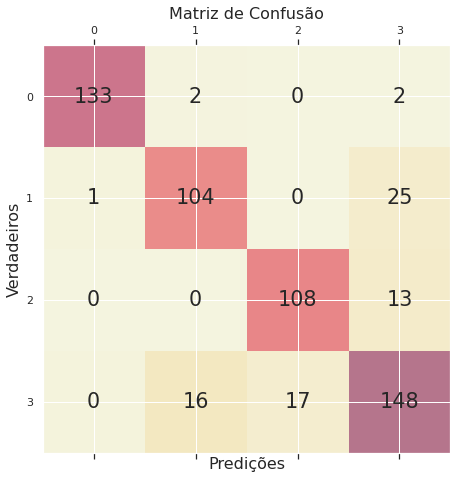

In [ ]:
#matriz de confusão do automl
cm_automl = confusion_matrix(y_test, dados)

#criando a figura com o matplotlib
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(cm_automl, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(cm_automl.shape[0]):
    for n in range(cm_automl.shape[1]):
        px.text(x=m,y=n,s=cm_automl[m, n], va='center', ha='center', size='xx-large')

#Nomeando as Labels
plt.xlabel('Predições', fontsize=16)
plt.ylabel('Verdadeiros', fontsize=16)
plt.title('Matriz de Confusão', fontsize=16)
plt.show()

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, automl.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, automl.predict(X_test))))

Ein: 0.1033
Eout: 0.1336


In [ ]:
#usando cross validation com 10 folds
modelo_cross = AutoSklearnClassifier(time_left_for_this_task=2*60, per_run_time_limit=30, n_jobs=-1, resampling_strategy = 'cv', resampling_strategy_arguments={'folds': 10})
#inicia a busca
modelo_cross.fit(X_train, y_train)

AutoSklearnClassifier(n_jobs=-1, per_run_time_limit=30,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 10},
                      time_left_for_this_task=120)

In [ ]:
#mostrando as estatísticas do processo
print(modelo_cross.sprint_statistics())

predic = modelo_cross.predict(X_test)
acc = accuracy_score(y_test, predic)

print("Acuracia: %.3f" % acc)
print(modelo_cross.leaderboard())

auto-sklearn results:
  Dataset name: f8b63f58-f15f-11ec-81a1-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.823529
  Number of target algorithm runs: 8
  Number of successful target algorithm runs: 2
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 0

Acuracia: 0.851
          rank  ensemble_weight               type      cost   duration
model_id                                                               
5            1              0.5  gradient_boosting  0.176471  21.943720
7            2              0.5                lda  0.227753  15.716588


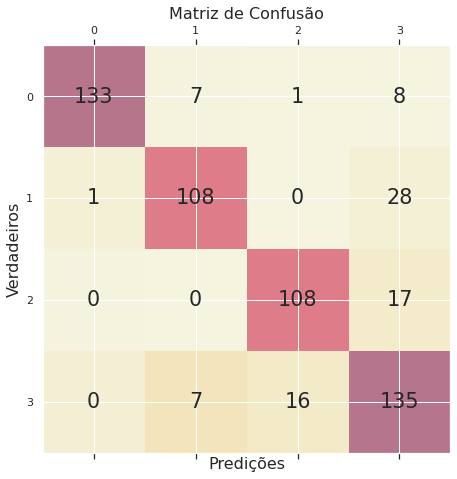

In [ ]:
#matriz de confusão do cv
cm_cv = confusion_matrix(y_test, predic)

#criando a figura com o matplotlib
fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(cm_cv, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(cm_cv.shape[0]):
    for n in range(cm_cv.shape[1]):
        px.text(x=m,y=n,s=cm_cv[m, n], va='center', ha='center', size='xx-large')

#Nomeando as Labels
plt.xlabel('Predições', fontsize=16)
plt.ylabel('Verdadeiros', fontsize=16)
plt.title('Matriz de Confusão', fontsize=16)
plt.show()

In [ ]:
print('Ein: %0.4f' % (1 - accuracy_score(y_train, modelo_cross.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, modelo_cross.predict(X_test))))

Ein: 0.1425
Eout: 0.1494


In [ ]:
#Dropando a Coluna de ratings
base_sr = base.drop(columns=['esrb_rating'], axis = 1)

In [ ]:
kmeans1 = KMeans(n_clusters=3)
predic = kmeans1.fit_predict(base_sr)
print("Analisando kmeans com 3 clusters:")
pontuacao = silhouette_score(base_sr, kmeans1.labels_, metric = 'euclidean')
print(f"Silhouette Score com 3 clusters: {pontuacao}")

Analisando kmeans com 3 clusters:
Silhouette Score com 3 clusters: 0.22983166569968486


In [ ]:
kmeans1 = KMeans(n_clusters=5)
predic = kmeans1.fit_predict(base_sr)
print("Analisando kmeans com 5 clusters:")
pontuacao = silhouette_score(base_sr, kmeans1.labels_, metric = 'euclidean')
print(f"Silhouette Score com 5 clusters: {pontuacao}")

Analisando kmeans com 5 clusters:
Silhouette Score com 5 clusters: 0.26426144358195547


In [ ]:
agg_clustering1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
predic1 = agg_clustering1.fit_predict(base_sr)

print("Analisando hierarquico average com 3 clusters:")
pontuacao = silhouette_score(base_sr, agg_clustering1.labels_, metric = 'euclidean')
print(f"Silhouette Score com 3 clusters: {pontuacao}" )

Analisando hierarquico average com 3 clusters:
Silhouette Score com 3 clusters: 0.3159044018410037


In [ ]:
agg_clustering1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
predic1 = agg_clustering1.fit_predict(base_sr)

print("Analisando hierarquico ward com 3 clusters:")
pontuacao = silhouette_score(base_sr, agg_clustering1.labels_, metric = 'euclidean')
print(f"Silhouette Score com 3 clusters: {pontuacao}" )

Analisando hierarquico ward com 3 clusters:
Silhouette Score com 3 clusters: 0.17969307719240593


In [ ]:
agg_clustering2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
predic1 = agg_clustering2.fit_predict(base_sr)

print("Analisando hierarquico average com 5 clusters:")
pontuacao = silhouette_score(base_sr, agg_clustering2.labels_, metric = 'euclidean')
print(f"Silhouette Score com 5 clusters: {pontuacao}" )

Analisando hierarquico average com 5 clusters:
Silhouette Score com 5 clusters: 0.2496853186359201


In [ ]:
agg_clustering2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
predic1 = agg_clustering2.fit_predict(base_sr)

print("Analisando hierarquico ward com 5 clusters:")
pontuacao = silhouette_score(base_sr, agg_clustering2.labels_, metric = 'euclidean')
print(f"Silhouette Score com 5 clusters: {pontuacao}" )

Analisando hierarquico ward com 5 clusters:
Silhouette Score com 5 clusters: 0.19216472797992115
